<h1><center> Delhivery Data Analysis Report</center></h1> 

<p>The company was Founded in 2011, Delhivery stands as India’s leading logistics and supply chain service provider. Offering a comprehensive suite of solutions—from express parcel transportation and warehousing to last-mile delivery—Delhivery leverages advanced technology and a vast delivery network to manage the nationwide movement of goods efficiently. Trusted by businesses of all sizes, Delhivery's commitment to innovation and customer satisfaction has made it the largest fully integrated logistics player in India by revenue in Fiscal 2021. With top-tier infrastructure and cutting-edge data intelligence initiatives led by its Data team, Delhivery aims to revolutionize the commerce operating system in India.</p>

## Features Of the Dataset

| Features | Description |
|----------|-------------|
| data | tells whether the data is testing or training data|
| trip_creation_time | Timestamp of trip creation |
| route_schedule_uuid | Unique Id for a particular route schedule |
| route_type | Transportation type |
| FTL(Full Truck Load) | FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way |
| Carting | Handling system consisting of small vehicles (carts) |
| trip_uuid | Unique ID given to a particular trip (A trip may include different source and destination centers) | 
| source_center | Source ID of trip origin |
| source_name | Source Name of trip origin |
| destination_cente | Destination ID |
| destination_name | Destination Name |
| od_start_time | Trip start time |
| od_end_time | Trip end time |
| start_scan_to_end_scan | Time taken to deliver from source to destination |
| is_cutoff | Unknown field |
| cutoff_factor | Unknown field |
| cutoff_timestamp | Unknown field |
| actual_distance_to_destination | Distance in Kms between source and destination warehouse |
| actual_time | Actual time taken to complete the delivery (Cumulative) |
| osrm_time | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) |
| osrm_distance | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) |
| factor | Unknown field |
| segment_actual_time | This is a segment time. Time taken by the subset of the package delivery |
| segment_osrm_time | This is the OSRM segment time. Time taken by the subset of the package delivery |
| segment_osrm_distance | This is the OSRM distance. Distance covered by subset of the package delivery |
| segment_factor | Unknown field |

## Importing libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Exploratory Data Analysis (EDA)

<p>Exploratory Data Analysis (EDA) is a crucial step in understanding and analyzing the dataset. It involves summarizing the main characteristics of the data, often using visual methods. By performing EDA, we aim to uncover patterns, detect anomalies, and test hypotheses, thus gaining deeper insights into the data.</p>

In [28]:
# creating dataframe
df = pd.read_csv("delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [29]:
# making a copy of the dataset

df1 = df.copy()
df1.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [30]:
df1.shape

(144867, 24)

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [32]:
df1.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


We will use ``` .describe(include="all") ``` to get the info about the numerical as well as the categorical columns in the dataset

In [33]:
df1.describe(include="all")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-22 04:55:04.835022,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [34]:
df1.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [35]:
df1.columns.tolist()

['data',
 'trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'is_cutoff',
 'cutoff_factor',
 'cutoff_timestamp',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

### Defining the KPI(Key Performing Indicator)

Key Performance Indicators (KPIs) are metrics that help us to understand how well our logistics operations are performing. Based on the columns we are provided, here are some KPIs and the relevant columns we can use to calculate and visualize them:

- **Delivery Time Performance:** actual_time, osrm_time, segment_actual_time, segment_osrm_time
- **Distance Efficiency:** actual_distance_to_destination, osrm_distance, segment_osrm_distance
- **Cutoff Time Performance:** is_cutoff, cutoff_factor, cutoff_timestamp
- **Operational Efficiency:** factor, segment_factor

### Null detection

In [36]:
# Checking how many null values are their

df1.isnull().sum().sum()

np.int64(554)

So their are only 554 null values in the dataset, Now let's see null values with respect to the columns

In [37]:
df1.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [38]:
# Investigate missing values
missing_percentage = (df[["source_name","destination_name"]].isnull().sum() / len(df)) * 100
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 source_name         0.202254
destination_name    0.180165
dtype: float64


Given the low percentage of missing values. We can make 2 approaches here, one is to drop the columns and other is to replace the values with the most frequent value or mode of that column, either approach is acceptable. Imputation with mode is generally preferable as it retains all rows in the dataset, which can be beneficial for analysis. However, if you decide to drop the rows, the impact on your analysis will be minimal due to the small proportion of missing data. Here I am going to replace the null values with the mode value just to retain the rows of the dataset.

In [39]:
# Fill missing values for 'source_name' and 'destination_name' with the mode
df1['source_name'].fillna(df1['source_name'].mode()[0], inplace=True)
df1['destination_name'].fillna(df1['destination_name'].mode()[0], inplace=True)

# Verify that missing values are handled
print("Missing Values after Imputation:\n", df1.isnull().sum())

Missing Values after Imputation:
 data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64


C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\1080222484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['source_name'].fillna(df1['source_name'].mode()[0], inplace=True)
C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\1080222484.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

## Univarate Analysis

We can make graphs related to time, distance as those can be treated as independent column and we will get insights related to delivery time and distace with the osrm i.e system generated time. So let's dive into analysising the time and distance columns.

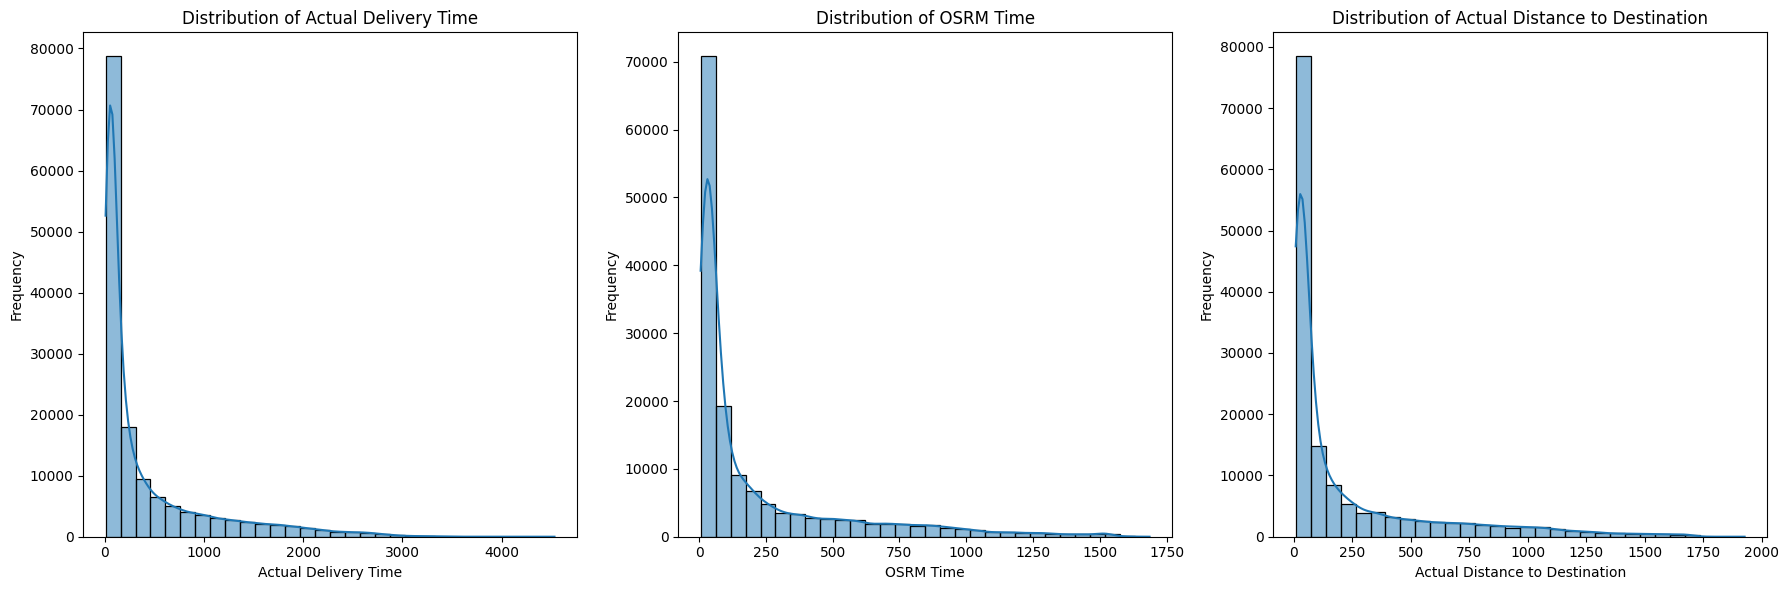

In [40]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for actual_time with KDE line in red
sns.histplot(df1['actual_time'], kde=True, bins=30, ax=axes[0], line_kws={'color': 'red'})
axes[0].set_title('Distribution of Actual Delivery Time')
axes[0].set_xlabel('Actual Delivery Time')
axes[0].set_ylabel('Frequency')

# Histogram for osrm_time with KDE line in blue
sns.histplot(df1['osrm_time'], kde=True, bins=30, ax=axes[1], line_kws={'color': 'blue'})
axes[1].set_title('Distribution of OSRM Time')
axes[1].set_xlabel('OSRM Time')
axes[1].set_ylabel('Frequency')

# Histogram for actual_distance_to_destination with KDE line in green
sns.histplot(df1['actual_distance_to_destination'], kde=True, bins=30, ax=axes[2], line_kws={'color': 'green'})
axes[2].set_title('Distribution of Actual Distance to Destination')
axes[2].set_xlabel('Actual Distance to Destination')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


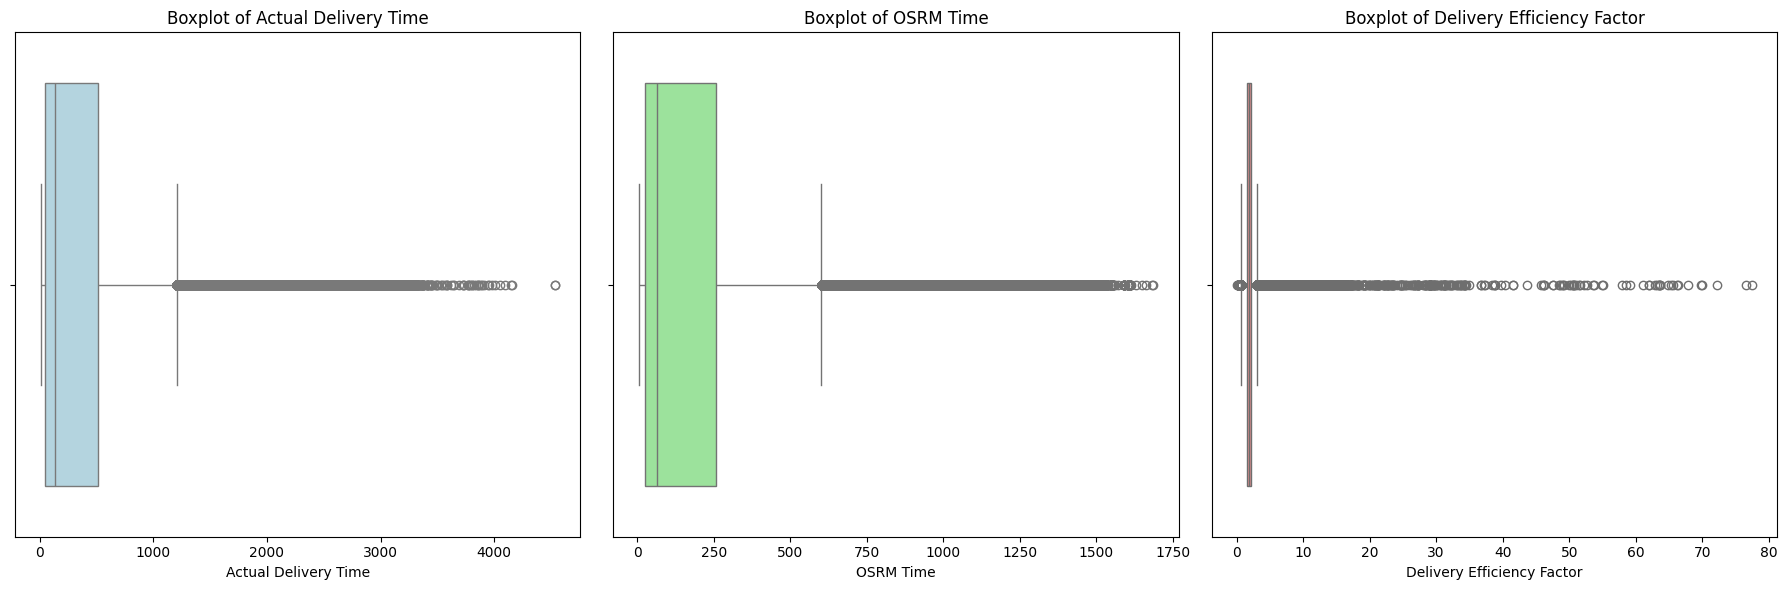

In [41]:
# Create a figure and subplots for box plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for actual_time
sns.boxplot(x=df1['actual_time'], ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot of Actual Delivery Time')
axes[0].set_xlabel('Actual Delivery Time')

# Box plot for osrm_time
sns.boxplot(x=df1['osrm_time'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of OSRM Time')
axes[1].set_xlabel('OSRM Time')

# Box plot for factor
sns.boxplot(x=df1['factor'], ax=axes[2], color='lightcoral')
axes[2].set_title('Boxplot of Delivery Efficiency Factor')
axes[2].set_xlabel('Delivery Efficiency Factor')

# Adjust layout
plt.tight_layout()
plt.show()

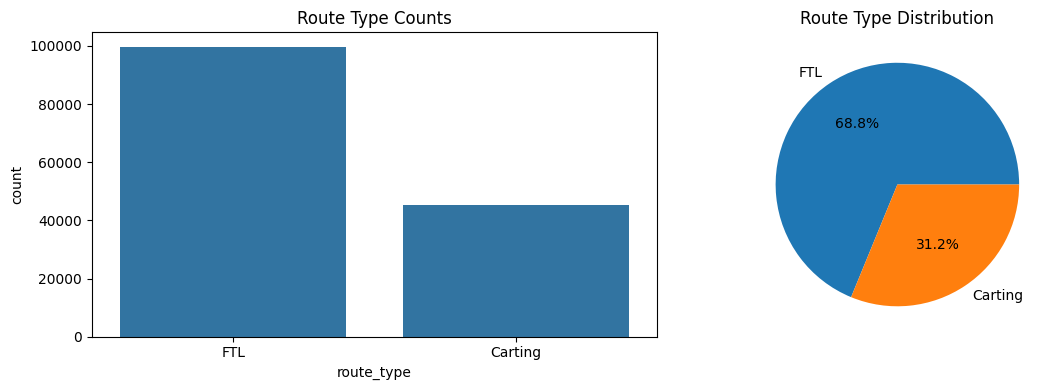

In [42]:
# Plotting Route Type Pie and Bar Chart
plt.figure(figsize=(12, 4))

# Route Type Bar Chart
plt.subplot(121)
sns.barplot(x=df['route_type'].value_counts().index, y=df['route_type'].value_counts())
plt.title('Route Type Counts')

# Route Type Pie Chart
plt.subplot(122)
plt.pie(df['route_type'].value_counts(), labels=df['route_type'].value_counts().index, autopct='%.1f%%')
plt.title('Route Type Distribution')

plt.tight_layout()
plt.show()

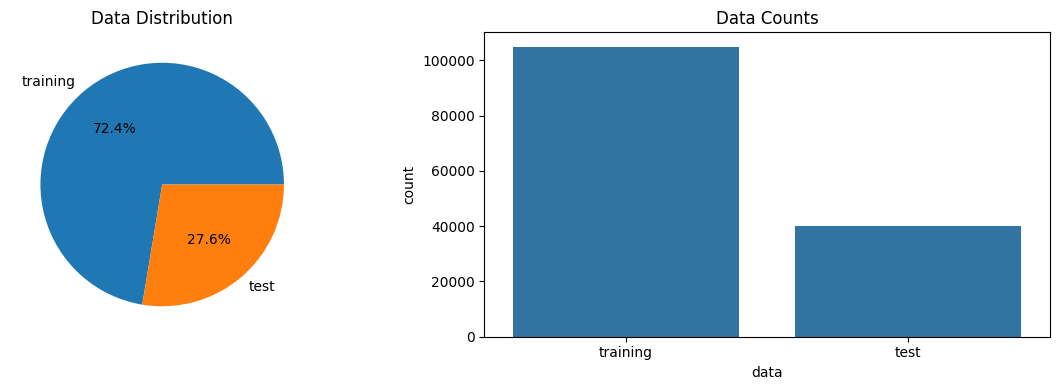

In [64]:
# Plotting Data Pie and Bar Chart
plt.figure(figsize=(12, 4))

# Data Pie Chart
plt.subplot(121)
plt.pie(df['data'].value_counts(), labels=df['data'].value_counts().index, autopct='%.1f%%')
plt.title('Data Distribution')

# Data Bar Chart
plt.subplot(122)
sns.barplot(x=df['data'].value_counts().index, y=df['data'].value_counts())
plt.title('Data Counts')

plt.tight_layout()
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\3411488428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='route_type', palette='viridis')


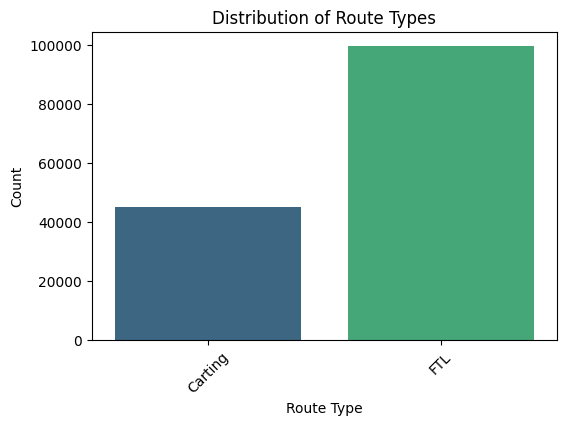

In [43]:
# Bar chart for route_type
plt.figure(figsize=(6, 4))
sns.countplot(data=df1, x='route_type', palette='viridis')
plt.title('Distribution of Route Types')
plt.xlabel('Route Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Finding the No. of deliveries by state,city By Combining the Column and extracting info

In [44]:
df1.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


As we have seen in above column that we don't have state given separately in a different and also the city. So we need to combine some columns and extract the information from it such as city, state of source and destination.

In [45]:
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
df1['segment_key'] = df1['trip_uuid'] + '+' + df1['source_center'] + '+' + df1['destination_center']
for col in segment_cols:
   df1[col + '_sum'] = df1.groupby('segment_key')[col].cumsum()
df1[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']].head()

,segment_key,segment_actual_time,segment_actual_time_sum,segment_osrm_distance,segment_osrm_distance_sum,segment_osrm_time,segment_osrm_time_sum
0,trip-153741093647649320+IND388121AAA+IND388620AAB,14.0,14.0,11.9653,11.9653,11.0,11.0
1,trip-153741093647649320+IND388121AAA+IND388620AAB,10.0,24.0,9.7590,21.7243,9.0,20.0
2,trip-153741093647649320+IND388121AAA+IND388620AAB,16.0,40.0,10.8152,32.5395,7.0,27.0
3,trip-153741093647649320+IND388121AAA+IND388620AAB,21.0,61.0,13.0224,45.5619,12.0,39.0
4,trip-153741093647649320+IND388121AAA+IND388620AAB,6.0,67.0,3.9153,49.4772,5.0,44.0


In [46]:
segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
 }
 # Grouping by segment_key and aggregating
segment_agg_data = df1.groupby('segment_key').agg(segment_dict).reset_index()
segment_agg_data = segment_agg_data.sort_values(by=['segment_key','od_end_time'])
segment_agg_data.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408


In [47]:
df2 = segment_agg_data.copy()

In [48]:
def extract_info(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None


In [49]:
df2[['source_city', 'source_place', 'source_state']] = df2['source_name'].apply(lambda x: pd.Series(extract_info(x)))

In [50]:
df2[['destination_city', 'destination_place', 'destination_state']] = df2['destination_name'].apply(lambda x: pd.Series(extract_info(x)))

In [87]:
df2['source_state'].value_counts().to_frame().style.background_gradient(cmap='Reds')

,count
source_state,
Maharashtra,3565
Karnataka,3453
Tamil Nadu,2130
Haryana,2122
Uttar Pradesh,1832
Telangana,1484
Gujarat,1401
West Bengal,1368
Andhra Pradesh,1310


In [51]:
cp = ['gray','red','orange','tomato','yellow','orangered','k','salmon','pink','red','green','tomato','cyan','orangered','k','salmon']

C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\2187177321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\2187177321.py:4: UserWarning: 
The palette list has fewer values (16) than needed (30) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)


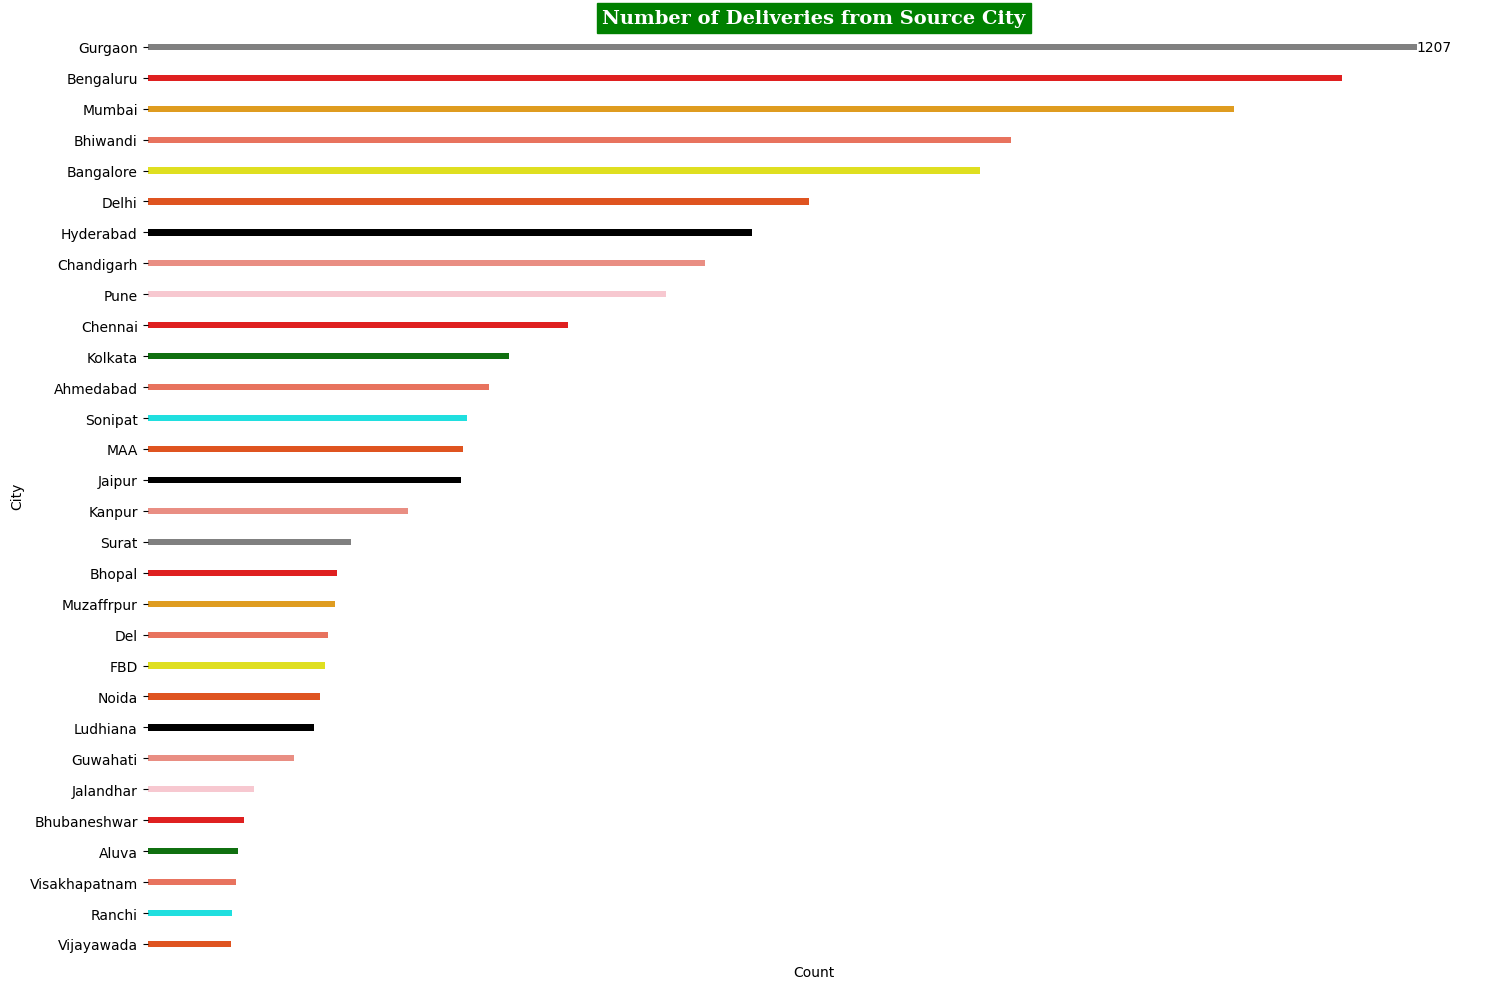

In [52]:
city_counts = df2['source_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\3629664684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\3629664684.py:4: UserWarning: 
The palette list has fewer values (16) than needed (30) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)


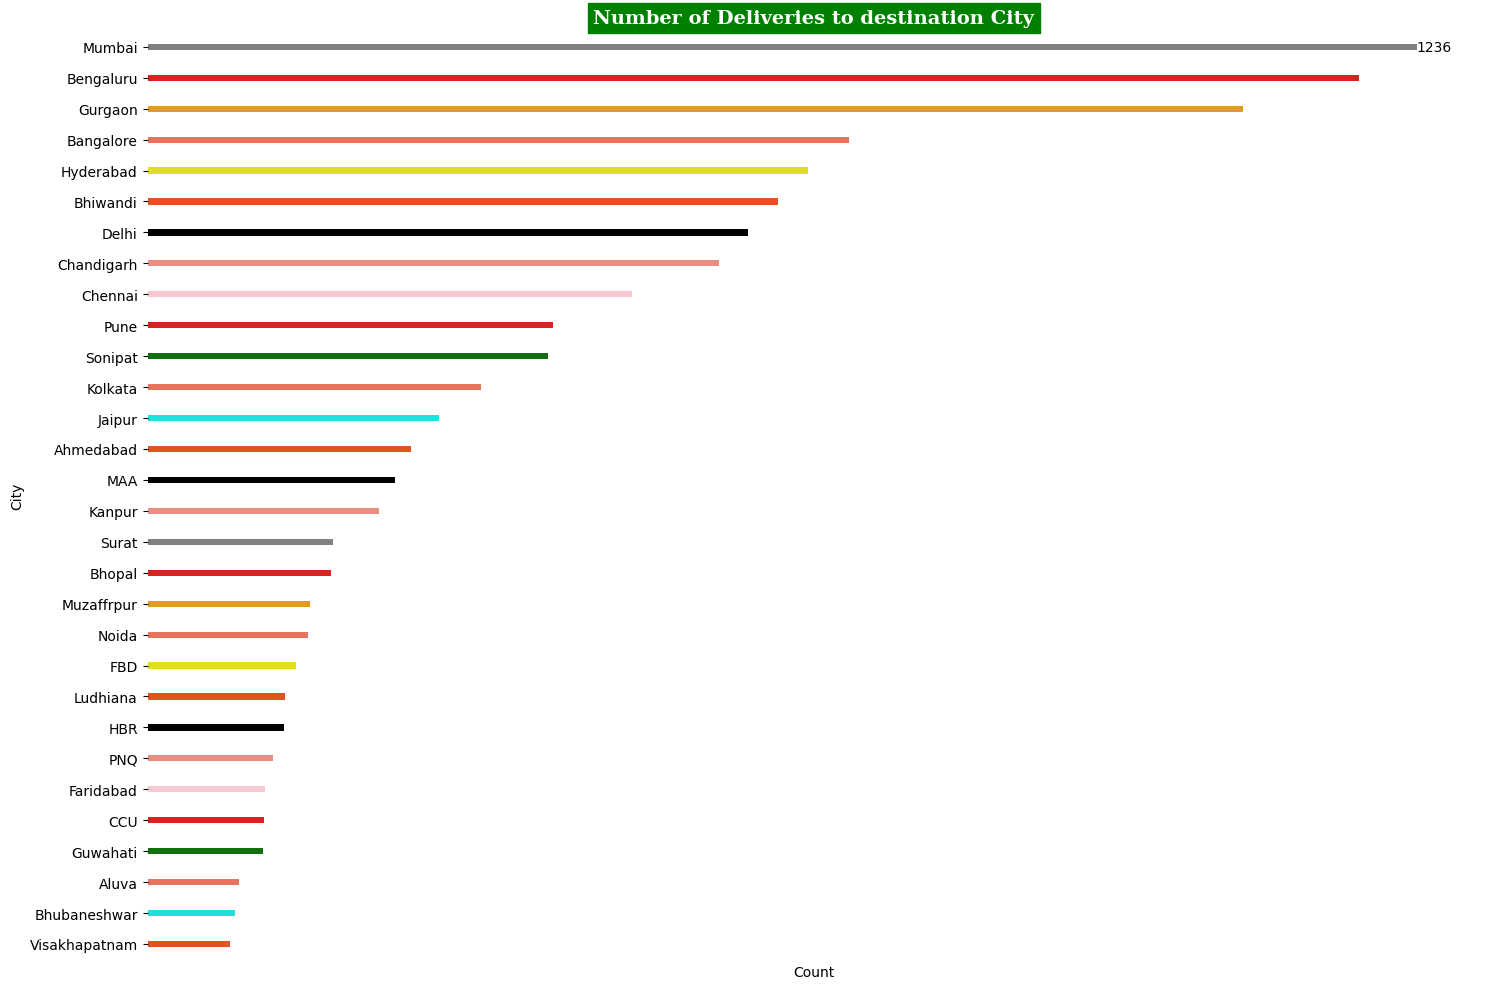

In [53]:
city_counts = df2['destination_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries to destination City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\4092005693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\4092005693.py:4: UserWarning: 
The palette list has fewer values (16) than needed (31) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)


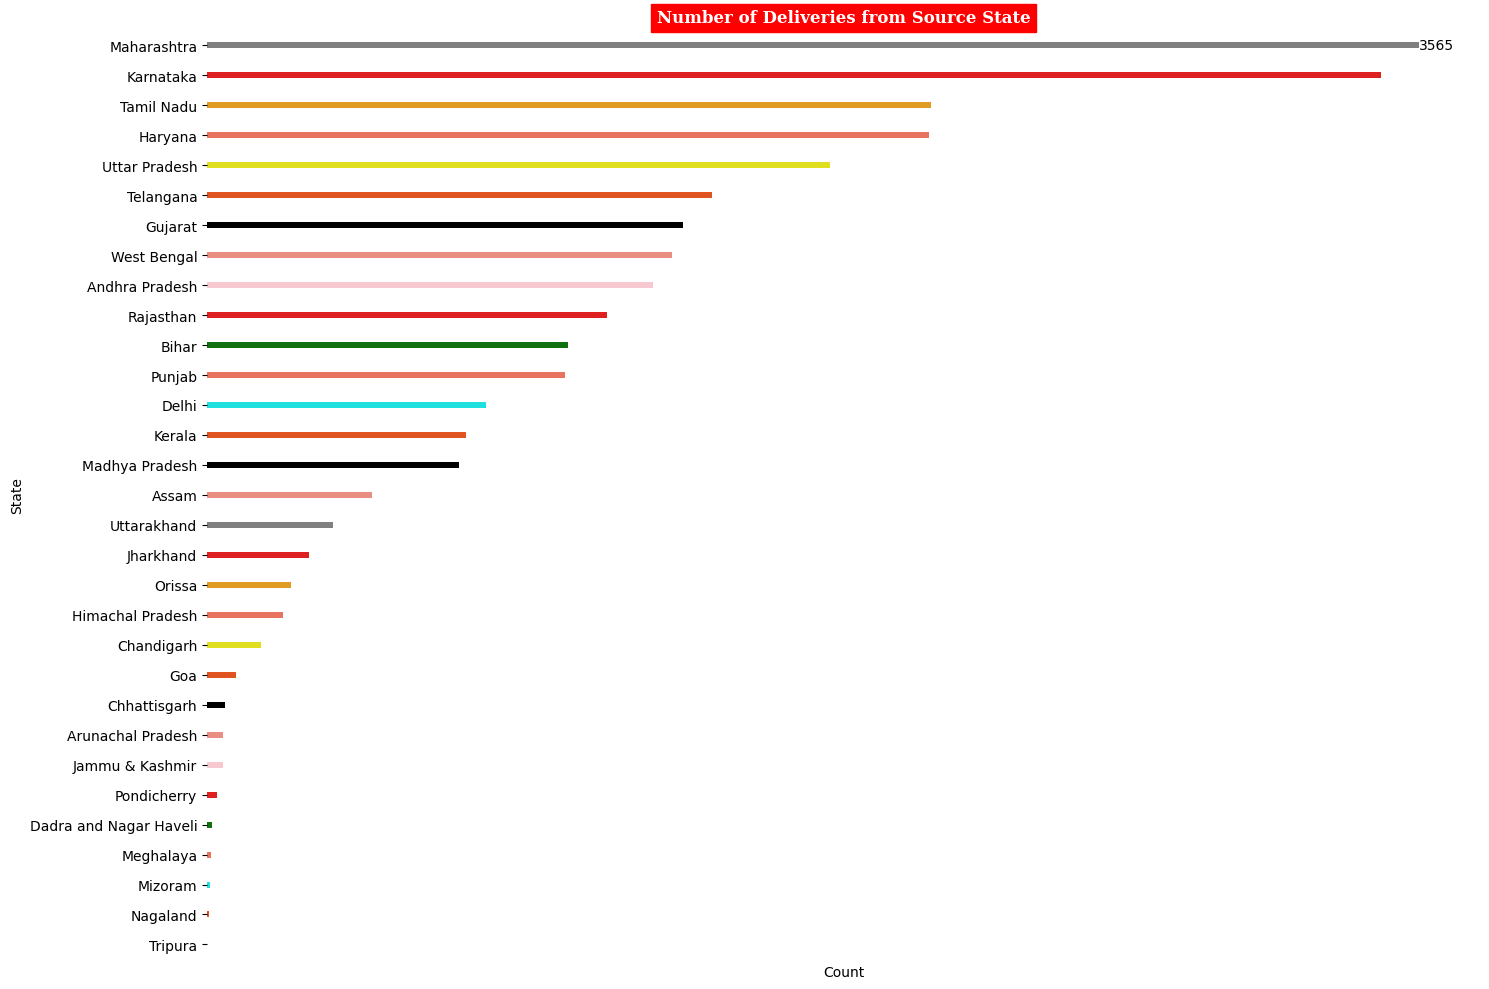

In [54]:
state_counts = df2['source_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\2016668661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\2016668661.py:4: UserWarning: 
The palette list has fewer values (16) than needed (32) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)


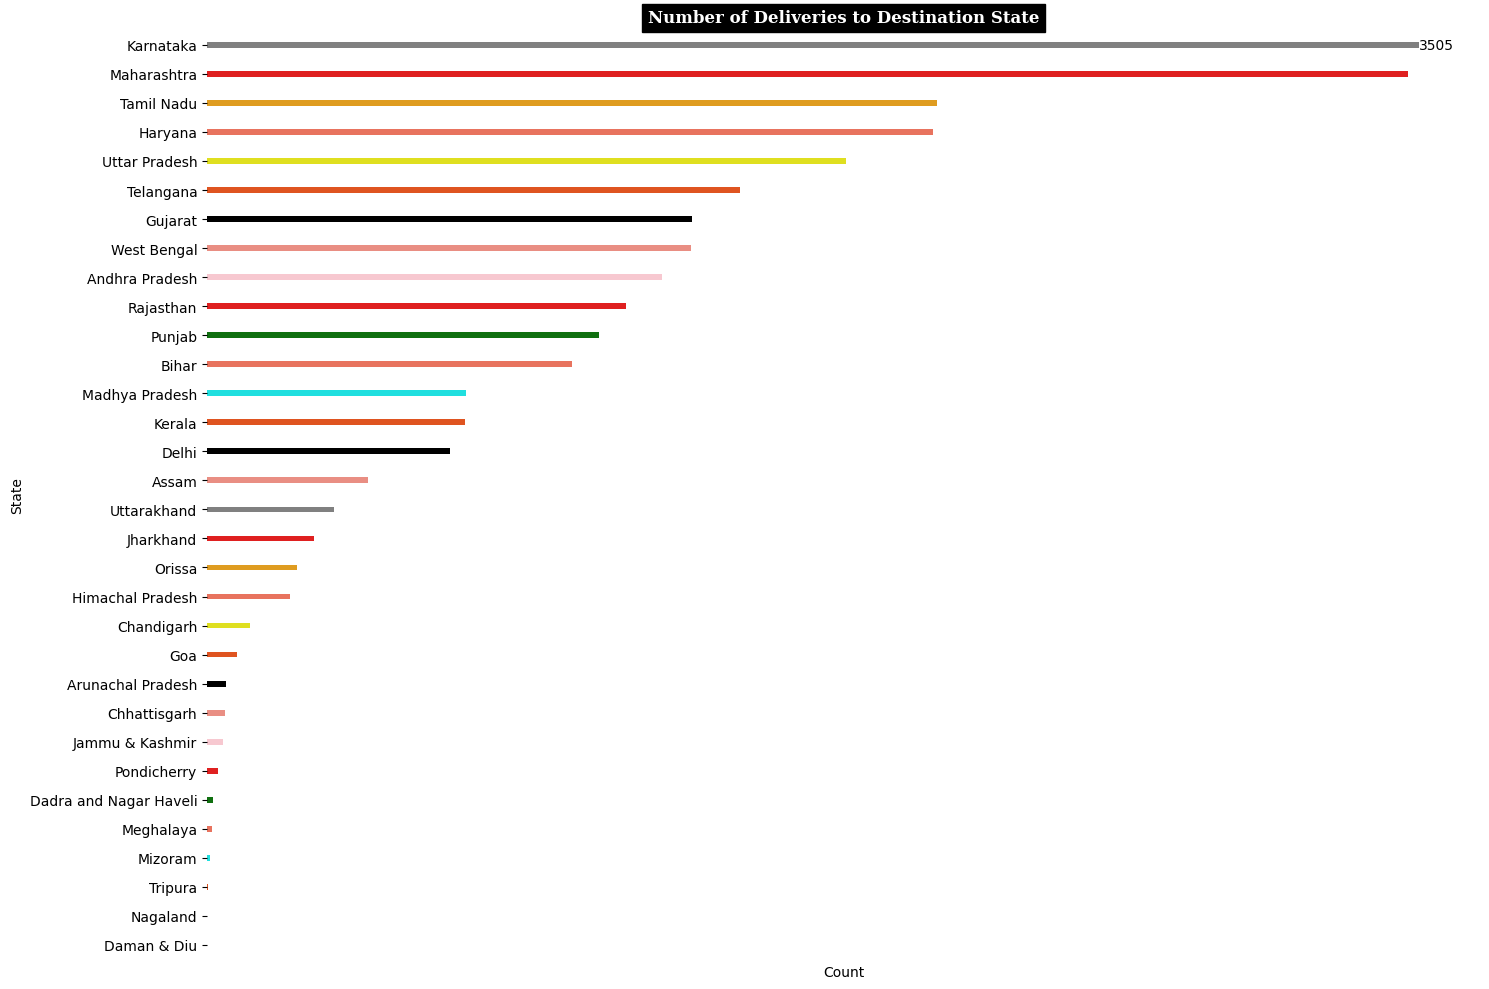

In [55]:
state_counts = df2['destination_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

### Trips created WRT days in month

In [56]:
# Convert trip_creation_time to datetime
df1['trip_creation_time'] = pd.to_datetime(df1['trip_creation_time'])

In [57]:
# Extract day of month and hour from trip_creation_time
df1['day_of_month'] = df1['trip_creation_time'].dt.day
df1['hour_of_day'] = df1['trip_creation_time'].dt.hour

C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\2613689516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='day_of_month', palette='viridis')


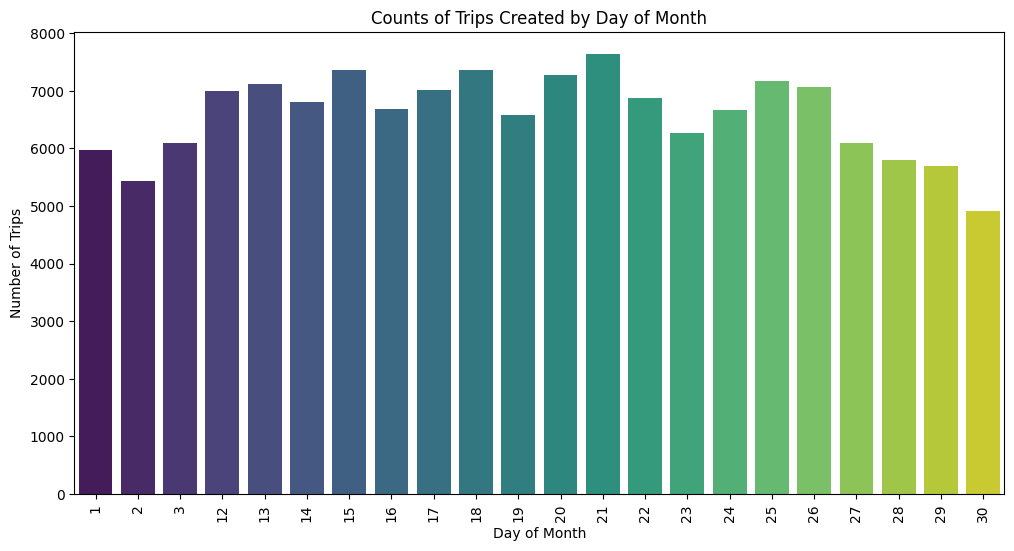

In [58]:
# Plotting the counts of trips created by day of the month
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='day_of_month', palette='viridis')
plt.title('Counts of Trips Created by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()

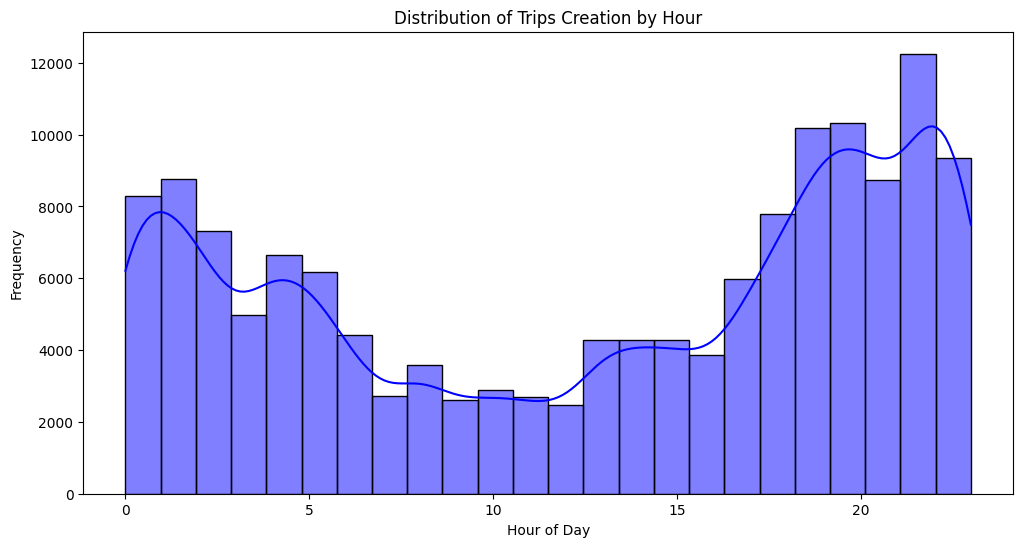

In [59]:
# Plotting the distribution of trips creation by hour
plt.figure(figsize=(12, 6))
sns.histplot(df1['hour_of_day'], bins=24, kde=True, color='blue')
plt.title('Distribution of Trips Creation by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

In [89]:
df1['trip_creation_day_week'] = df1['trip_creation_time'].dt.day_name()

C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\3510835033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette=cp,width=0.3)
C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\3510835033.py:4: UserWarning: The palette list has more values (16) than needed (7), which may not be intended.
  sns.barplot(x=day_counts.index, y=day_counts.values, palette=cp,width=0.3)
C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\3510835033.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=day_counts.index, palette=cp,width=0.3)
C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\3510835033.py:14: UserWarning: The palette list has more values (16) than n

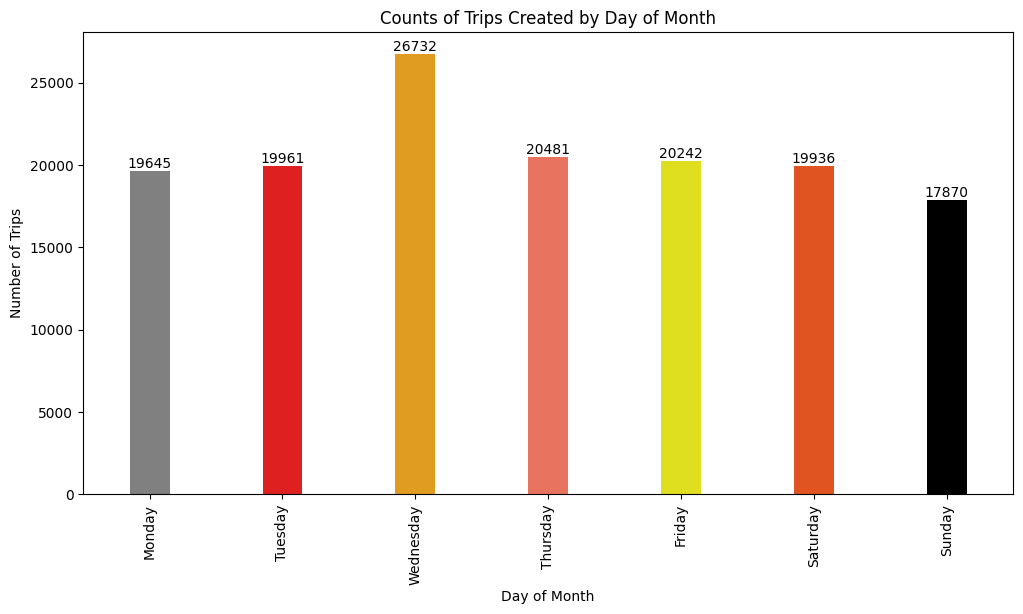

In [93]:
plt.figure(figsize=(12,6))
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df1['trip_creation_day_week'].value_counts().reindex(weekday_order)
sns.barplot(x=day_counts.index, y=day_counts.values, palette=cp,width=0.3)
for i, count in enumerate(day_counts.values):
   plt.text(i, count, str(count), ha='center', va='bottom')

sns.countplot(x=day_counts.index, palette=cp,width=0.3)
plt.title('Counts of Trips Created by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()

## Bivarate Analysis

Bivariate analysis involves examining the relationship between two variables.

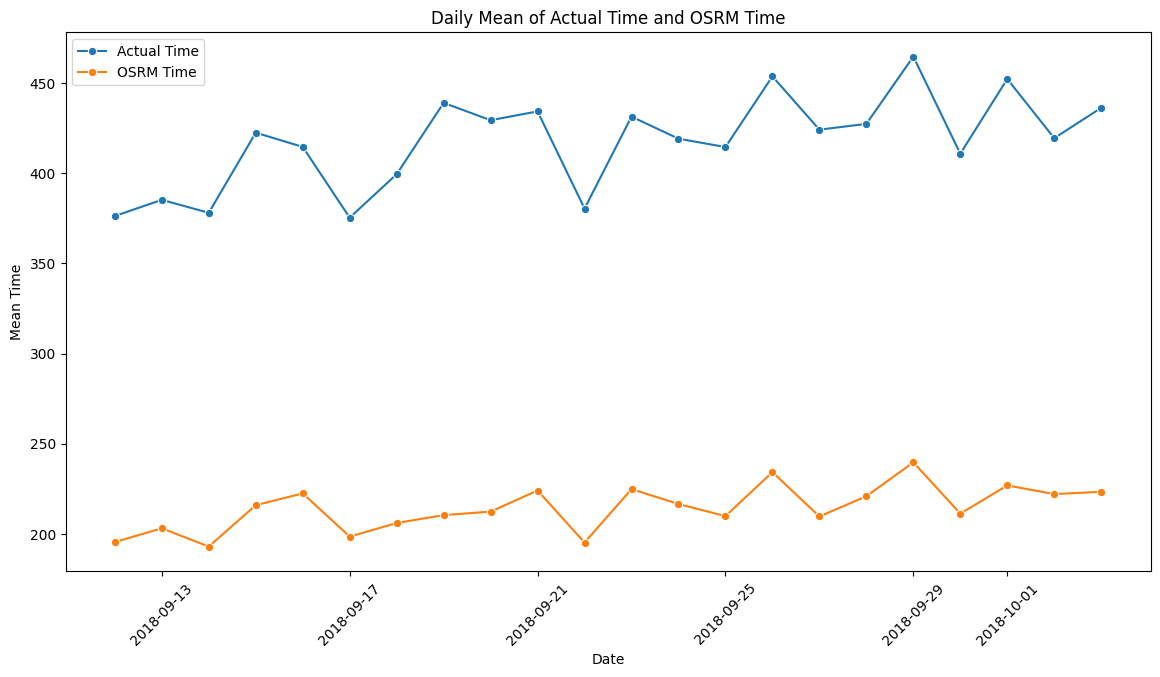

In [60]:
# Ensure trip_creation_time is in datetime format
df1['trip_creation_time'] = pd.to_datetime(df1['trip_creation_time'])

# Extract the date from trip_creation_time
df1['trip_creation_date'] = df1['trip_creation_time'].dt.date

# Calculate the daily mean of actual_time and osrm_time
daily_means = df1.groupby('trip_creation_date')[['actual_time', 'osrm_time']].mean().reset_index()

# Plot the daily mean of actual_time and osrm_time
plt.figure(figsize=(14, 7))
sns.lineplot(x='trip_creation_date', y='actual_time', data=daily_means, marker='o', label='Actual Time')
sns.lineplot(x='trip_creation_date', y='osrm_time', data=daily_means, marker='o', label='OSRM Time')
plt.title('Daily Mean of Actual Time and OSRM Time')
plt.xlabel('Date')
plt.ylabel('Mean Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

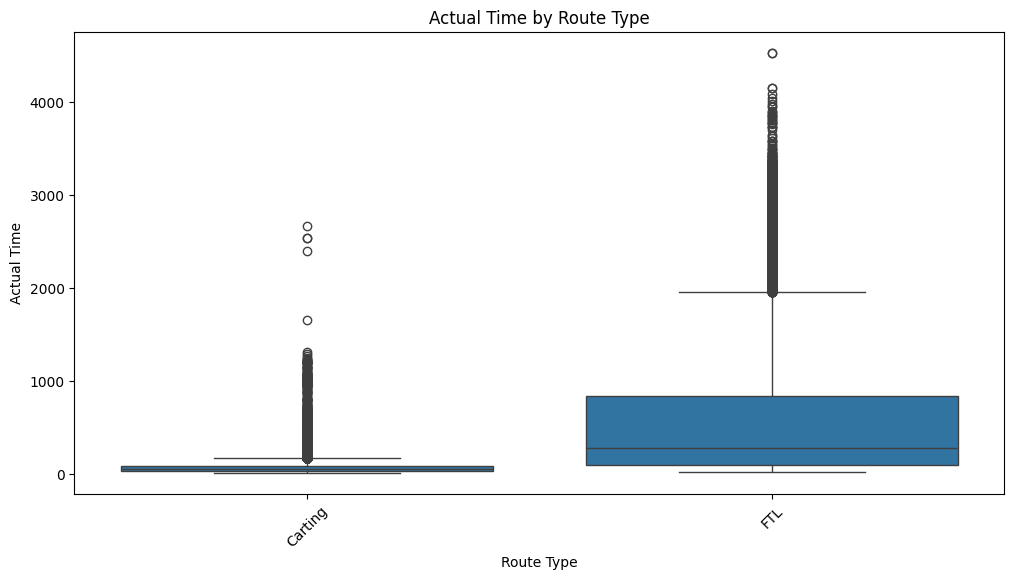

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='route_type', y='actual_time', data=df1)
plt.title('Actual Time by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Actual Time')
plt.xticks(rotation=45)
plt.show()

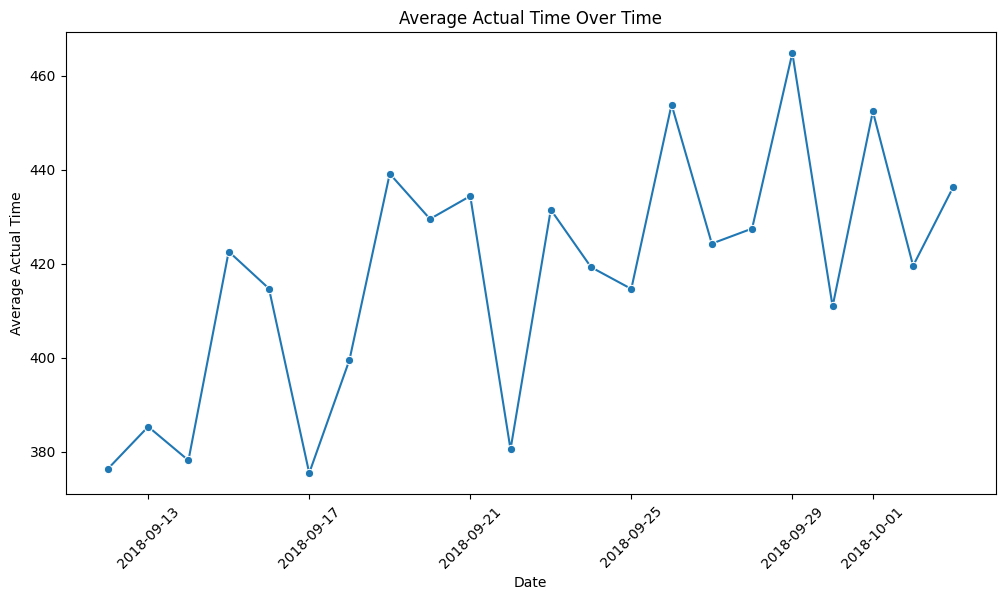

In [62]:
df['trip_creation_date'] = pd.to_datetime(df['trip_creation_time']).dt.date
daily_trips = df.groupby('trip_creation_date')['actual_time'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='trip_creation_date', y='actual_time', data=daily_trips, marker='o')
plt.title('Average Actual Time Over Time')
plt.xlabel('Date')
plt.ylabel('Average Actual Time')
plt.xticks(rotation=45)
plt.show()

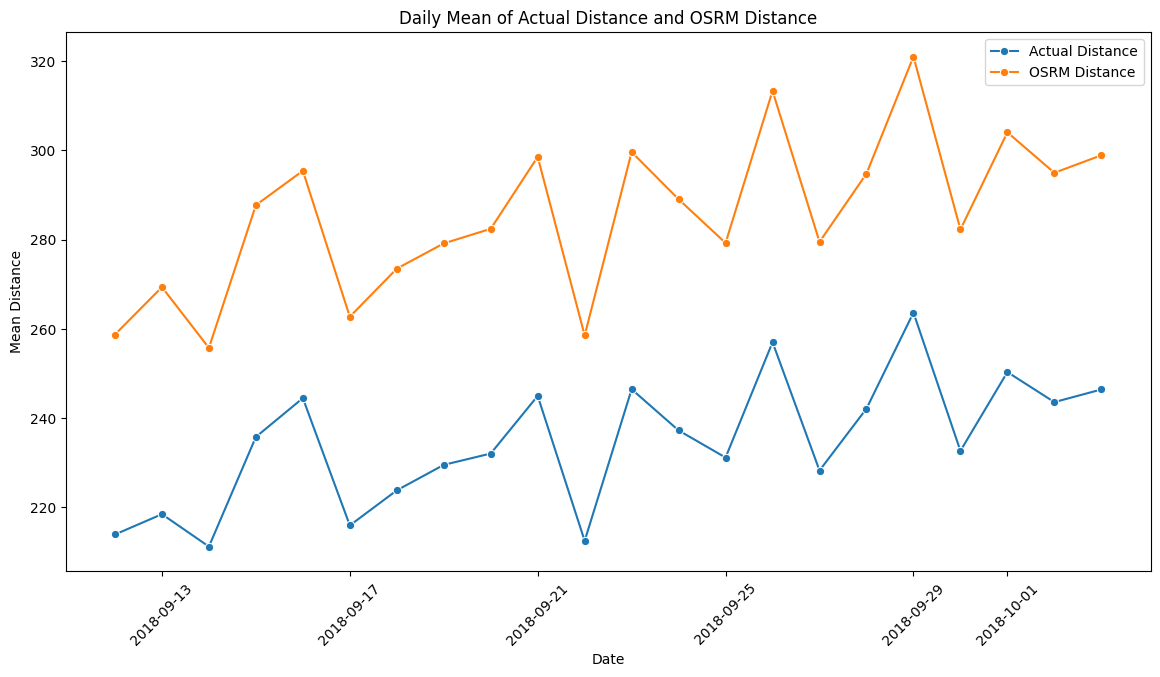

In [63]:
# Ensure trip_creation_time is in datetime format
df1['trip_creation_time'] = pd.to_datetime(df1['trip_creation_time'])

# Extract the date from trip_creation_time
df1['trip_creation_date'] = df1['trip_creation_time'].dt.date

# Calculate the daily mean of actual_distance_to_destination and osrm_distance
daily_distance_means = df1.groupby('trip_creation_date')[['actual_distance_to_destination', 'osrm_distance']].mean().reset_index()

# Plot the daily mean of actual_distance_to_destination and osrm_distance
plt.figure(figsize=(14, 7))
sns.lineplot(x='trip_creation_date', y='actual_distance_to_destination', data=daily_distance_means, marker='o', label='Actual Distance')
sns.lineplot(x='trip_creation_date', y='osrm_distance', data=daily_distance_means, marker='o', label='OSRM Distance')
plt.title('Daily Mean of Actual Distance and OSRM Distance')
plt.xlabel('Date')
plt.ylabel('Mean Distance')
plt.xticks(rotation=45)
plt.legend()
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\882556482.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='route_type', y='actual_time', data=df, palette='Set3')


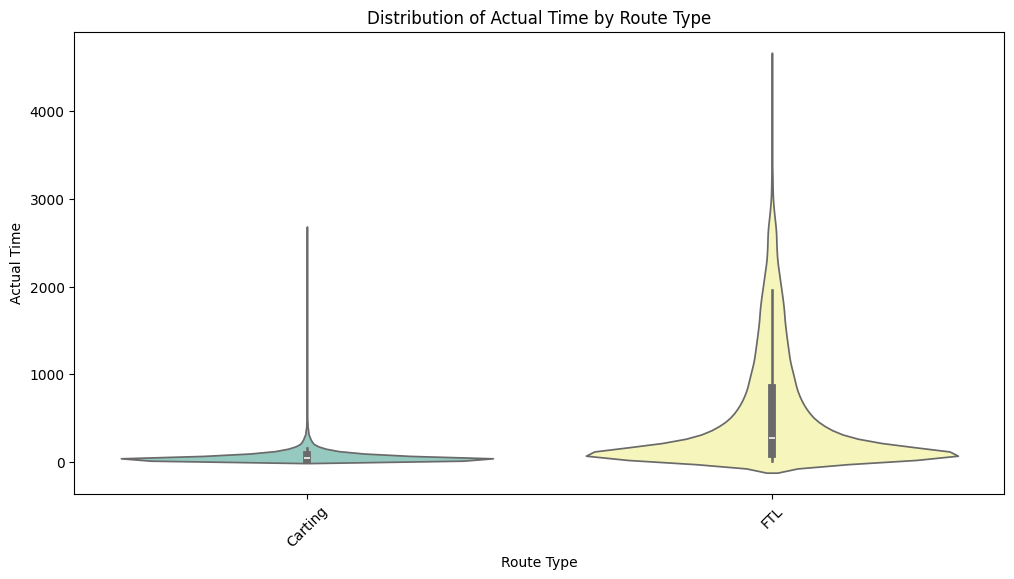

In [69]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='route_type', y='actual_time', data=df, palette='Set3')
plt.title('Distribution of Actual Time by Route Type')
plt.xlabel('Route Type')
plt.ylabel('Actual Time')
plt.xticks(rotation=45)
plt.show()


Now let's analyse the cutoff time and how it effects the delivery time and cutoff time of the source centers. Cutoff time is basically the time the packages takes to dispatch from the source.

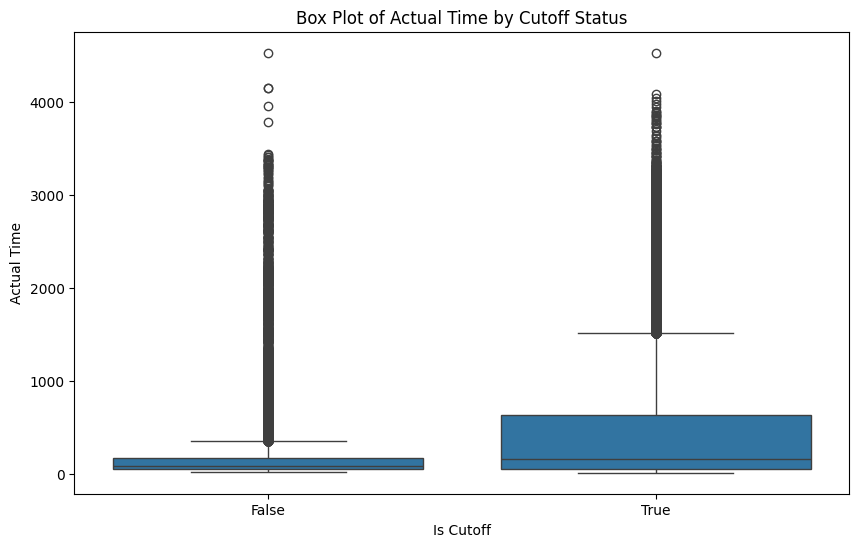

In [94]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_cutoff', y='actual_time', data=df)
plt.title('Box Plot of Actual Time by Cutoff Status')
plt.xlabel('Is Cutoff')
plt.ylabel('Actual Time')
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_12648\1555936802.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='source_center', y='cutoff_factor', data=df_top, ci=None)


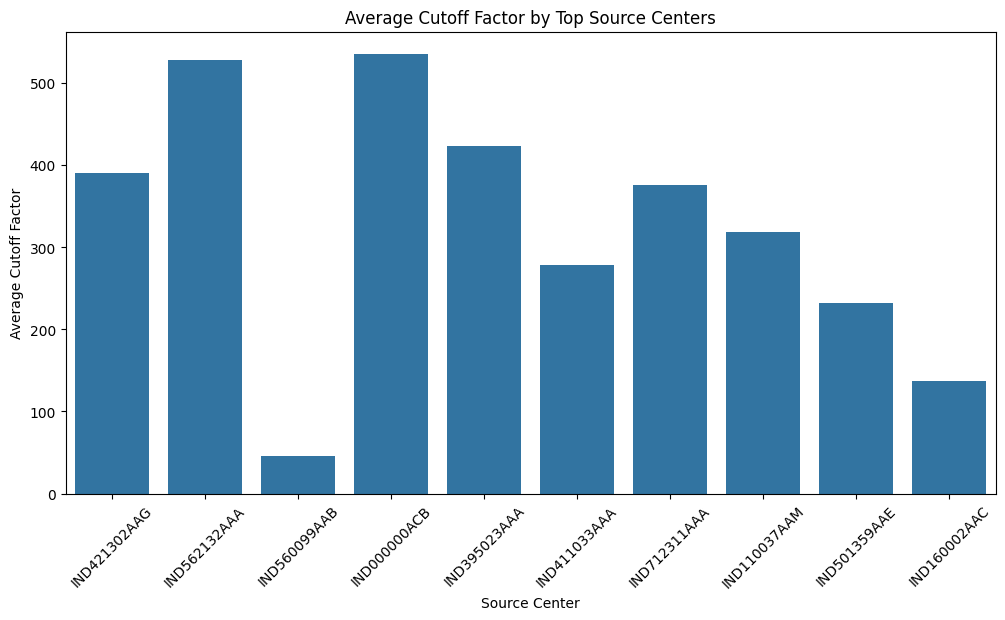

In [95]:
top_source_centers = df['source_center'].value_counts().head(10).index
df_top = df[df['source_center'].isin(top_source_centers)]

plt.figure(figsize=(12, 6))
sns.barplot(x='source_center', y='cutoff_factor', data=df_top, ci=None)
plt.title('Average Cutoff Factor by Top Source Centers')
plt.xlabel('Source Center')
plt.ylabel('Average Cutoff Factor')
plt.xticks(rotation=45)
plt.show()


### Multivarate Analysis

Multivariate analysis involves examining more than two variables simultaneously to understand relationships and interactions among them.

In [77]:
top_n = 10  # Define the number of top source centers you want to analyze
top_source_centers = df['source_name'].value_counts().head(top_n).index
# Filter the dataset to include only rows from the top source centers
df_top = df1[df1['source_name'].isin(top_source_centers)]
top_source_centers

Index(['Gurgaon_Bilaspur_HB (Haryana)', 'Bangalore_Nelmngla_H (Karnataka)',
       'Bhiwandi_Mankoli_HB (Maharashtra)', 'Pune_Tathawde_H (Maharashtra)',
       'Hyderabad_Shamshbd_H (Telangana)', 'Kolkata_Dankuni_HB (West Bengal)',
       'Chandigarh_Mehmdpur_H (Punjab)', 'Surat_HUB (Gujarat)',
       'Delhi_Airport_H (Delhi)', 'Bengaluru_Bomsndra_HB (Karnataka)'],
      dtype='object', name='source_name')

We are going to find the relationship between the route type, time and source name. So here we are going to use 3 variable as it is a multivarate analysis. We will take top 10 source name by count, so that our graphs will look clean.

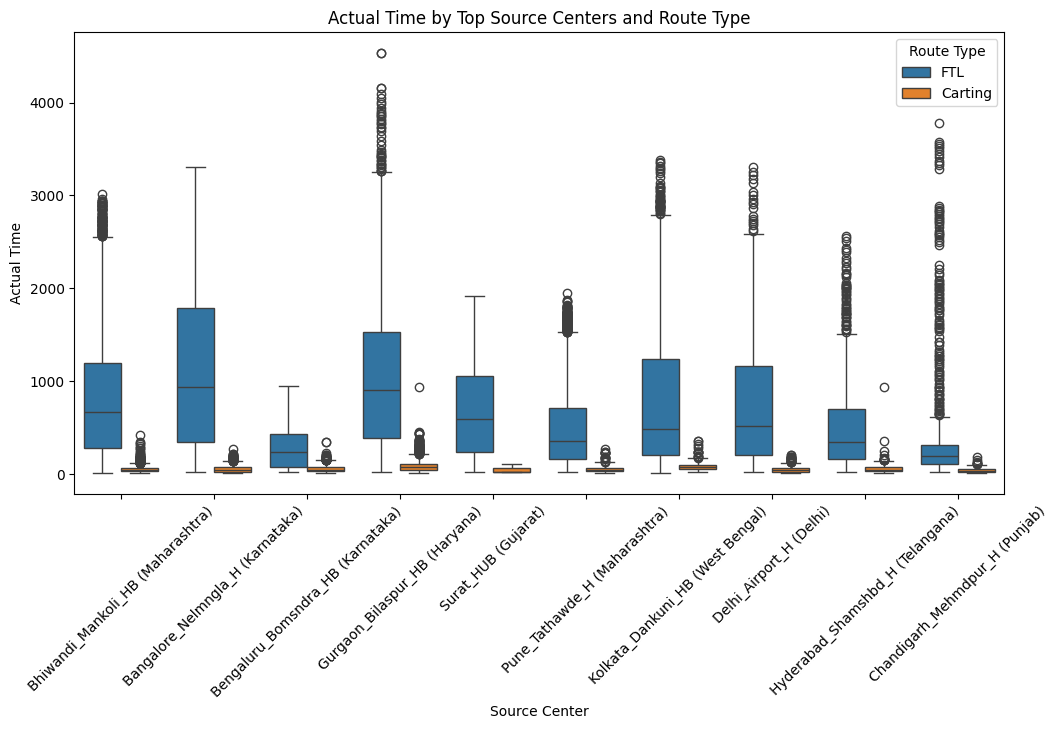

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='source_name', y='actual_time', hue='route_type', data=df_top)
plt.title('Actual Time by Top Source Centers and Route Type')
plt.xlabel('Source Center')
plt.ylabel('Actual Time')
plt.xticks(rotation=45)
plt.legend(title='Route Type')
plt.show()

We can make a heatmap for actual_time, osrm_time, actual_distance and osrm_distance

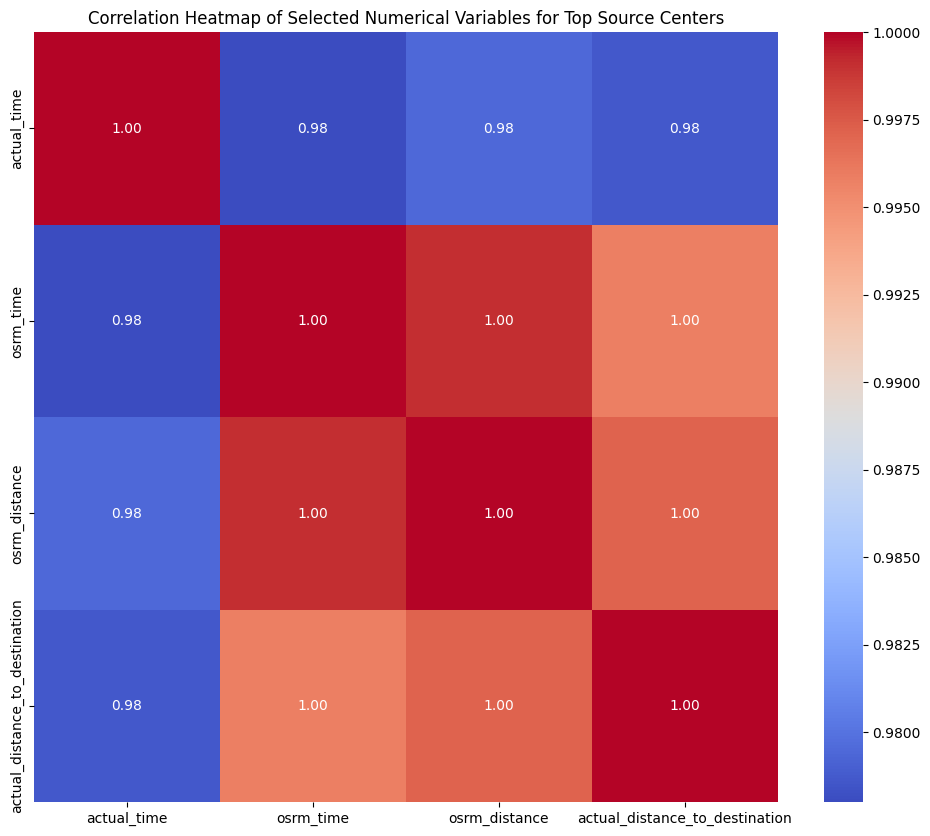

In [85]:
plt.figure(figsize=(12, 10))
corr_matrix = df1[['actual_time', 'osrm_time', 'osrm_distance', 'actual_distance_to_destination']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Numerical Variables for Top Source Centers')
plt.show()

Now let's analyse the Cutoff time related all the possible multivarate analysis 

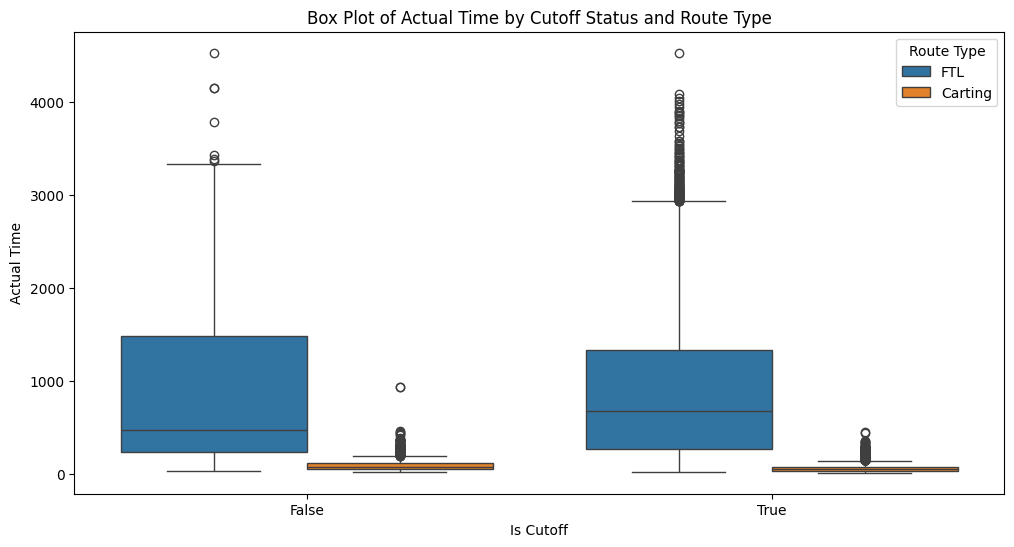

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_cutoff', y='actual_time', hue='route_type', data=df_top)
plt.title('Box Plot of Actual Time by Cutoff Status and Route Type')
plt.xlabel('Is Cutoff')
plt.ylabel('Actual Time')
plt.legend(title='Route Type')
plt.show()

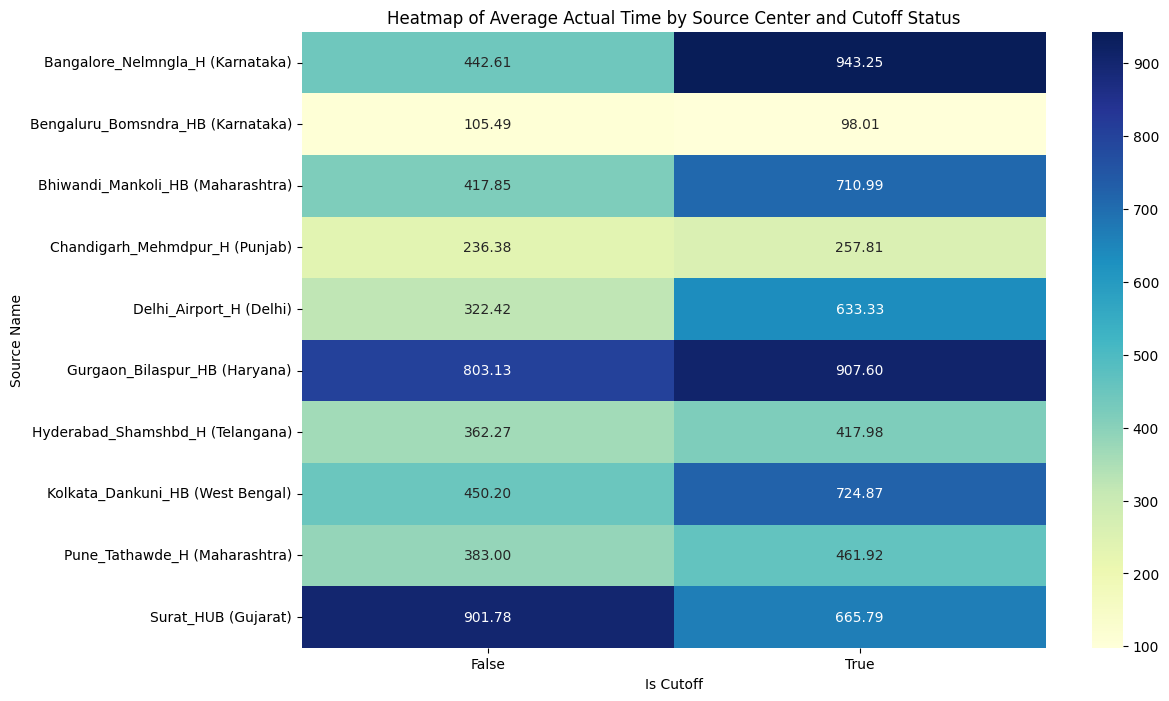

In [105]:
pivot_table = df_top.pivot_table(values='actual_time', index='source_name', columns='is_cutoff', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Average Actual Time by Source Center and Cutoff Status')
plt.xlabel('Is Cutoff')
plt.ylabel('Source Name')
plt.show()

# Business Insights

- **Timeframe of Data**: The data spans from '2018-09-12' to '2018-10-08', covering a period of 26 days.


- **Monthly Distribution**: 88% of the trips are from October, and the remaining are from September.


- **Data Skewness**: The entire dataset is heavily right-skewed.


- **Feature Correlation**: Almost all the features are heavily positively correlated with each other, which is intuitive.


- **Trip Distribution**: The start and end dates of the months have a lower percentage of trips compared to the middle of the month, though 
the difference is not huge.


- **Mid-Month Orders**: Most orders come mid-month, indicating that customers usually make more orders in the middle of the month.


- **Gap in Trips**: It's very strange to see that there are absolutely no trips from the 4th to the 11th day of the month.


#### Route type
The analysis reveals that a higher proportion of shipments are routed through Full Truck Load (FTL) as opposed to carting. This has important implications for the efficiency and speed of the delivery process.


#### Geographical Focus
Understanding the busiest routes and distances can help optimize logistics operations, improve transportation efficiency, and potentially reduce costs.


- **State**: The states of Haryana, Maharashtra, and Karnataka are not only busy source states but also emerge as the busiest source states, indicating a high demand or significant business activities originating from these regions.


- **Source City**: Gurgaon, Bangalore, and Bhiwandi are identified as the busiest source cities, suggesting that these cities play a crucial role in contributing to the overall business operations or transportation activities.


- **Destination City**: Gurgaon, Bangalore, and Hyderabad are identified as the busiest destination cities, underscoring their significance in terms of business activities or population movement.


- **Busiest Corridor**: Overall, the busiest corridor is between Mumbai, Maharashtra, and Bangalore, Karnataka, which has the maximum trips.


- **Average Distance**: 74.852844 kilometers


- **Average Time (in hours)**: 5.346577921457034


#### Delivery Time & Distance Accuracy:

**OSRM Time vs. Actual Time**
- **Difference in Mean Values**: The difference between the mean values of estimated delivery time and actual delivery time suggests that 
there may be variations or delays in the actual delivery process compared to the initial estimates.

- **Optimistic Estimates**: The fact that the mean of OSRM time is less than the mean of actual delivery time indicates that the estimated times provided by the OSRM (Open Source Routing Machine) service tend to be optimistic.

**OSRM Distance vs. Actual Distance**
- **Overestimated Distances**: The mean of OSRM distance being greater than the mean of actual distance to the destination suggests that the OSRM might overestimate the distances. This could impact route planning and fuel efficiency calculations.


- **Time Consistency**: The equality in the mean values of actual time and segment actual time suggests that the time measurements are consistent across different segments of the delivery process.
- **Distance Conservatism**: The mean of segment OSRM distance being greater than the mean of OSRM distance implies that the OSRM might provide more conservative estimates for distance within individual segments.

#### Additional Insights
- **Gap in Trips**: As depicted from the analysis, there is absolutely no trip from the 4th to the 11th day of the month. The reason for this gap can be investigated and addressed to receive orders during these dates as well.
- **Promoting FTL Route Handling**: More ways to promote Full Truckload (FTL) route handling systems can be implemented to increase this percentage, enhancing overall operational efficiency.


## Business Recommendations
### Areas for improvement

**Route Optimization:**

1. **How can the transportation network within Karnataka be optimized, given that it has the busiest state routes, to improve efficiency and reduce congestion?**
   - Implementing route optimization algorithms and real-time traffic monitoring systems can enhance the transportation network within Karnataka. 
   - These measures help in dynamically adjusting routes based on current traffic conditions.

**Operational Efficiency:**

1. **How can the insight that the mean OSRM (Open Source Routing Machine) time is less than the mean actual delivery time be used to set more realistic delivery time expectations for customers?**
   - Analyzing the discrepancies between OSRM time and actual delivery time allows for adjustments in estimated delivery times to be more realistic, thus setting accurate expectations for customers and improving their satisfaction.

2. **What advanced demand forecasting techniques can be implemented to anticipate peak travel times and adjust transportation services accordingly, thereby improving resource allocation and minimizing congestion during peak hours?**
   - Implementing machine learning models and predictive analytics can help forecast demand more accurately. 
   - Techniques such as time-series analysis, regression models, and neural networks can anticipate peak travel times, allowing for adjustments in transportation services and better resource allocation.


3. **How can route planning algorithms be refined, discrepancies in estimated times and distances addressed, and processes between different stages of delivery streamlined to enhance overall operational efficiency?**
   - Continuous improvement of route planning algorithms through feedback loops and incorporating real-time data can address discrepancies. 


**Customer Satisfaction:**

1. **How can the accuracy of estimated delivery times and distances be improved to increase customer satisfaction by setting clear and realistic expectations?**
   - Improving the accuracy of estimated delivery times and distances involves using more precise data and predictive models. Communicating these realistic estimates to customers can set clear expectations, reducing uncertainty and increasing satisfaction.

2. **How can faster delivery times facilitated by a higher proportion of Full Truckload (FTL) shipments be leveraged to directly impact customer satisfaction and meet or exceed their expectations regarding shipment speed?**
   - Prioritizing FTL shipments can achieve faster delivery times. Communicating this benefit to customers and ensuring timely deliveries can enhance their satisfaction, as they value prompt service.

**Customer Profiling:**

1. **What insights can be gained from conducting customer profiling for customers from Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh to understand why major orders come from these states and improve the buying and delivery experience?**
   - Customer profiling can reveal buying patterns, preferences, and specific needs of customers from these states. Understanding these factors can help tailor services, marketing strategies, and delivery processes to better meet customer expectations and improve their overall experience.

**Cost Optimization:**

1. **How can understanding the differences in estimated and actual times and distances help fine-tune logistics planning, leading to better resource allocation and potentially reducing operational costs?**
   - Understanding these differences allows for improvements in estimation models and planning processes. Accurate estimations lead to better resource allocation, reducing waste and inefficiencies, which in turn lowers operational costs.

**Collaboration with Stakeholders:**

1. **How can collaboration with relevant stakeholders, including government authorities, transportation companies, and local communities, be achieved to develop and implement comprehensive strategies for managing and optimizing transportation in identified busy corridors and cities?**
   - Collaboration with stakeholders involves regular communication, joint planning sessions, and leveraging each other's expertise and resources. 
   - Developing public-private partnerships and engaging with local communities can lead to the implementation of comprehensive and effective transportation management strategies.

## SUMMARY OF FINDINGS

#### Trip Durations
- The majority of trips have durations ranging between 30 to 500 minutes.
- A significant number of outliers were observed, with some trips extending up to 4500 minutes.
- The mean trip duration is approximately 416.93 minutes, with a standard deviation of 598.10 minutes.

#### Distances
- The actual distances traveled range widely from 20 to 1600 kilometers, with some trips covering up to 7898 kilometers.
- The mean distance is 1037.01 kilometers, with a standard deviation of 344.76 kilometers.

#### Efficiency Factors
- The efficiency factor, calculated as the ratio of actual time to OSRM time, has a mean of 2.12.
- Significant outliers indicate potential inefficiencies, with some trips showing an efficiency factor as high as 77.39.

#### Segment Analysis
- Segment-specific data shows a wide range of values, with some segments having negative times, indicating data recording issues.
- The mean segment actual time is 36.20 minutes, with a maximum of 3051 minutes.

#### Overall Performance
- The distribution of performance metrics suggests room for improvement in certain routes and segments.
- The presence of outliers and anomalies highlights the need for data quality improvement.

## KEY INSIGHTS

#### Outlier Management
- Addressing extreme outliers in trip durations and distances is crucial for refining efficiency metrics.
- Outliers can distort performance analysis, leading to inaccurate conclusions.

#### Efficiency Improvement
- Specific routes and segments with lower efficiency have been identified.
- Targeted interventions, such as optimizing route planning and reducing delays, can significantly improve overall performance.

#### Data Quality
- Improving data collection methods to reduce anomalies and ensure accurate recording of trip details will enhance the reliability of future analyses.
- Implementing robust data validation and cleaning processes can help in maintaining high data quality.

#### Operational Strategies
- Strategies such as dynamic route adjustments based on real-time traffic conditions and better resource allocation can be explored.
- Investing in technology and infrastructure to support efficient logistics operations is recommended.

### CONCLUSION

This comprehensive analysis of Delhivery's logistics performance and efficiency reveals significant insights and areas for improvement. By addressing outliers, improving efficiency, and enhancing data quality, Delhivery can optimize its logistics operations and maintain its leadership position in the industry. Implementing the recommendations provided will help in achieving better resource allocation, improving customer satisfaction, and reducing operational costs, thereby driving overall operational excellence.